# Introduction and Dataset Description
Since this is an introductory article, the problem that we are going to solve is pretty simple. Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are diabetic or not. Our dataset looks like this.

In [ ]:
import pandas as pd
import numpy as np

!gdown --id -q 1EJmU7Mli1oXLPJfXGrus0HHfVnXM6wpk
!unzip -q Data.zip

data = pd.read_csv('Data.csv')
data.head()

In the above table, we have five columns: Person, Smoking, Obesity, Exercise, and Diabetic. Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.

It is clearly evident from the dataset that a person's obesity is indicative of him being diabetic. Our task is to create a neural network that is able to predict whether an unknown person is diabetic or not from the given data about his exercise habits, obesity, and smoking habits. This is a type of supervised learning problem where we are given inputs and corresponding correct outputs and our task is to find the mapping between the inputs and the outputs.

**Note**: This is just a fictional dataset, in real life, obese people are not necessarily always diabetic.

# The Solution
We will create a very simple neural network with one input layer, one hidden layer (that will contain two hidden units) and one output layer. Before writing any actual code, let's first let's see how our neural network will execute, in theory. For simplicity, we are not considering the bias term.<br>
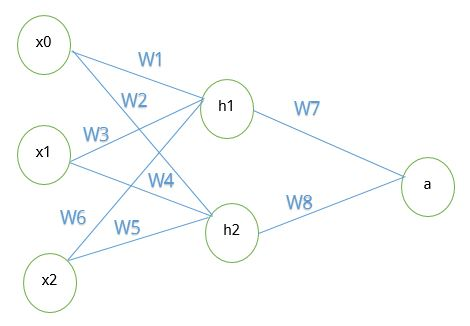



### Separating feature values from labels

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
X = X.T
y = y.reshape((1, len(y)))

print(f'X:\n {X}')
print(f'y:\n {y}')

### Weight Initialization
At first, we will consider random weights. We will store the weights values for input layer and hidden layer in matrix `W1`. Weight values for hidden layer and output layer will be stored in matrix `W2`.<br>
Since, there are 3 input units and 2 hidden units, the dimension of matrix `W1` will be 3 × 2. For the same reason, dimension of matrix `W2` will be 2 × 1.

In [ ]:
number_of_neurons_in_input_layer = len(X)
number_of_neurons_in_hidden_layer = 2
number_of_neurons_in_output_layer = 1

W1 = np.random.random((number_of_neurons_in_hidden_layer, number_of_neurons_in_input_layer))
W2 = np.random.random((number_of_neurons_in_output_layer, number_of_neurons_in_hidden_layer))

print(f'W1:\n {W1}')
print(f'W2:\n {W2}')

## Forward Propagation
At first, we will calculate the weighted sum by multiplying `X` with `W1`. Let this result be `Z1`.<br>
$$z^{[1](i)} = \sum_{j=1}^{n} x_j^{(i)}w_{j}^{[1]}$$

In [ ]:
Z1=np.dot(W1, X)
print(f'Z1:\n {Z1}')

$Z^{[1]}$ is the value of hidden layer. To keep this value between 0 and 1, we will pass it through a `sigmoid` function and calculate `A1`.<br>
$$sigmoid = \frac{1}{1+e^{-Z^{[1]}}}$$

In [ ]:
def sigmoid(x):
    return (1/(1+np.exp(-x.astype(float))))

In [ ]:
A1 = sigmoid(Z1)
print(f'A1:\n {A1}')

Now we'll calculate the value of output layer by multiplying the value of hidden layer `A1` with `W2`. Then, we'll pass the resultant value through a sigmoid function which in turn will return us the final value `A2`.<br>
$$z^{[2](i)} = \sum_{j=1}^{n} a_{j}^{[1](i)}w_{j}^{[2]}$$<br>
$$A^{[2]} = sigmoid(Z^{[2]})$$


In [ ]:
Z2=np.dot(W2,A1)
A2=sigmoid(Z2)
print(f'A2:\n {A2}')

But, this is not our final output. We'll calculate the `error` from the difference between our ground truth `y` and `A2`.<br>
$$error = L= \frac{1}{2} (A^{[2]}-y)^2$$

In [ ]:
L = (0.5*(np.power((A2-y),2)))
print(f'error:\n {L}')

## Back Propagation

### Updating `W2`
Back Propagation will start now. This means that in order to minimize the error that we have received, we will repeatedly update the weights of the `W1` and `W2` matrix back from the output layer and calculate the error. In this way we can reduce the error a lot at a time and predict the value which will be closer to the actual output.<br>

So first we will find out how much change in the weights of `W2` will reduce our error. We will deduct the value of $\frac {dL}{dW^{[2]}}$ from $W^{[2]}$.<br>
$$W^{[2]} = W^{[2]} - learningRate×\frac{dL}{dW^{[2]}}$$.<br>
From the chain rule of calculus, we can calculate the value of $\frac {dL}{dW^{[2]}}$ as follows,<br>

$$\frac {dL}{dW^{[2]}} = \frac {dL}{dZ^{[2]}} × \frac {dZ^{[2]}}{dW^{[2]}}$$<br>
$$\frac {dL}{dW^{[2]}} = \frac {dL}{dA^{[2]}} × \frac {dA^{[2]}}{dZ^{[2]}} × \frac {dZ^{[2]}}{dW^{[2]}}$$<br>
$$\frac {dL}{dA^{[2]}} = \frac{d}{dA^{[2]}}(\frac{1}{2} (A^{[2]}-y)^2)=A^{[2]}-y$$<br>


In [ ]:
dA2 = A2-y
print(f'dA2:\n {dA2}')

Now, the second therm which is needed to calculate $\frac {dL}{dW^{[2]}}$ is basically the derivative of the `sigmoid` function.<br>
$\frac{dA^{[2]}}{dZ^{[2]}} = \frac{d}{dZ^{[2]}}(\frac{1}{1+e^{-Z^{[2]}}})$<br>
$\frac{dA^{[2]}}{dZ^{[2]}} = \frac{d}{dZ^{[2]}}({1+e^{-Z^{[2]}}})^{-1}$<br>
$\frac{dA^{[2]}}{dZ^{[2]}} = (-1)({1+e^{-Z^{[2]}}})^{-2}(-e^{-Z^{[2]}})$<br>
....<br>....<br>
$\frac{dA^{[2]}}{dZ^{[2]}} =\frac{1}{1+e^{-Z^{[2]}}}×(1-\frac{1}{1+e^{-Z^{[2]}}}) = sigmoid(Z^{[2]})×(1-sigmoid(Z^{[2]}))=A^{[2]}×(1-A^{[2]})$

In [ ]:
def sigmoid_derivative(x):
    return x*(1-x)
dA2Z2 = sigmoid_derivative(A2)
print(f'dA2Z2:\n {dA2Z2}')

The last term,<br>
$$\frac{dZ^{[2]}}{dW^{[2]}} = \frac{d}{dW^{[2]}}(A^{[1]}×W^{[2]}) = A^{[1]}$$<br>
Now, we have all the necessary information to calculate $\frac {dL}{dW^{[2]}}$

In [ ]:
dW2 = np.dot((dA2*dA2Z2), A1.T)
print(f'dW2:\n {dW2}')

Now, we'll update the weight values of `w2` by subtracting $\frac{dEa_o}{dw_2}$ from `w2`. But, for faster convergence, we'll multiply $\frac{dEa_o}{dw_2}$ by `learning_rate = 3`.

In [ ]:
learning_rate = 3
W2 = W2 - learning_rate*dW2
print(f'W2:\n {W2}')

### Updating `W1`
Now we will go one more step backward. The updated value of `W1` will be, $$W^{[1]} = W^{[1]} - learningRate×\frac{dL}{dW^{[1]}}$$<br>
Now, using chain rule as before, we will calculate the value of $\frac{dL}{dW^{[1]}}$.<br>


$$\frac{dL}{dW^{[1]}} = \frac{dL}{dZ^{[1]}}×\frac{dZ^{[1]}}{dW^{[1]}}$$
$$\frac{dL}{dW^{[1]}} = \frac{dL}{dA^{[1]}}×\frac{dA^{[1]}}{dZ^{[1]}}×\frac{dZ^{[1]}}{dW^{[1]}}$$
Since, there is no direct relationship between $dL$ and $dA^{[1]}$, we have to break them again using chain rule as follows.
$$\frac{dL}{dA^{[1]}} = \frac{dL}{dZ^{[2]}}×\frac{dZ^{[2]}}{dA^{[1]}} = \frac{dL}{dA^{[2]}}×\frac{dA^{[2]}}{dZ^{[2]}}×\frac{dZ^{[2]}}{dA^{[1]}}$$
But, we have already calculated the value of $\frac{dL}{dA^{[2]}}×\frac{dA^{[2]}}{dZ^{[2]}}$ while updating `W2`. So,
$$\frac{dZ^{[2]}}{dA^{[1]}} = \frac{d}{dA^{[1]}}(A^{[1]}×W^{[2]}) = W^{[2]}$$

In [ ]:
dZ2 = dA2*dA2Z2
dA1 = np.dot(W2.T, dZ2)
print(f'dA1:\n {dA1}')

We have successfully calculated the value of $\frac{dL}{dA^{[1]}}$. As it is the derivative of sigmoid, $$\frac{dA^{[1]}}{dZ^{[1]}} = A^{[1]}\times(1-A^{[1]})$$

In [ ]:
dA1Z1 = sigmoid_derivative(A1)
print(f'dA1Z1:\n {dA1Z1}')

Now, for the last term to calculate $\frac{dL}{dW^{[1]}}$,$$\frac{dZ^{[1]}}{dW^{[1]}} = \frac{d}{dW^{[1]}}(X×W^{[1]}) = X$$

In [ ]:
dW1 = np.dot(dA1*dA1Z1, X.T)
print(f'dW1:\n {dW1}')

Now, we'll update the weight values of `W1` by subtracting $\frac{dL}{dW^{[1]}}$ from `W1`.

In [ ]:
W1 = W1-learning_rate*dW1
print(f'W1:\n {W1}')

# Prediction

In [ ]:
def predict(X,W1,W2):
  Z1 = np.dot(W1, X)
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1)
  A2 = sigmoid(Z2)
  return A2

In [ ]:
prediction = predict(X, W1, W2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

# Training
Let's run for 500 epochs and check whether the loss decreases or not. In the mean time, the prediction should get better.

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
X = X.T
y = y.reshape((1, len(y)))

W1 = np.random.random((2, 3))
W2 = np.random.random((1, 2))

epochs = 50
learning_rate = 3

for i in range(0, epochs):
    Z1 = np.dot(W1, X)
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1)
    A2 = sigmoid(Z2)
    L = (0.5 * (np.power((A2 - y), 2)))
    print(f'Error in epoch {i+1}: {np.sum(L)}')


    dA2 = A2 - y
    dA2Z2 = sigmoid_derivative(A2)
    dW2 = np.dot((dA2 * dA2Z2), A1.T)
    W2 = W2 - learning_rate * dW2

    dZ2 = dA2 * dA2Z2
    dA1 = np.dot(W2.T, dZ2)
    dA1Z1 = sigmoid_derivative(A1)
    dW1 = np.dot((dA1 * dA1Z1), X.T)
    W1 = W1 - learning_rate * dW1

prediction = predict(X, W1, W2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')